# Field manipulation

The objective here is to create and manipulate a field. A field is the agregation of a mesh $\mathcal{M}$ of a domain $\mathcal{D} \in \mathbb{R}^n$ and a sample of values in $\mathbb{R}^d$ associated to each vertex of the mesh.

We note $(\underline{t}_0, \dots, \underline{t}_{N-1})$ the vertices of $\mathcal{M}$ and $(\underline{x}_0, \dots, \underline{x}_{N-1})$ the associated values in $\mathbb{R}^d$.

A field is stored in the *Field* object that stores the mesh and the values at each vertex of the mesh.
It can be built from a mesh and values or as a realization of a stochastic process.

In [2]:
from __future__ import print_function
import openturns as ot
import math as m

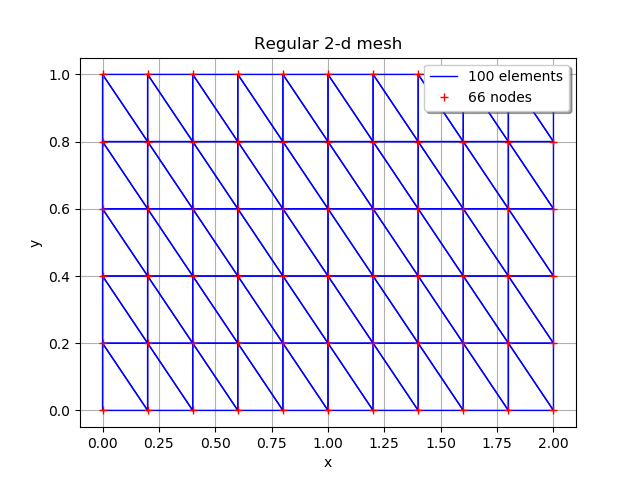

In [4]:
# First, define a regular 2-d mesh
discretization = [10, 5]
mesher = ot.IntervalMesher(discretization)
lowerBound = [0.0, 0.0]
upperBound = [2.0, 1.0]
interval = ot.Interval(lowerBound, upperBound)
mesh = mesher.build(interval)
graph = mesh.draw()
graph.setTitle('Regular 2-d mesh')
graph

In [37]:
# Create a field as a realization of a process
amplitude = [1.0]
scale = [0.2]*2
myCovModel = ot.ExponentialModel(scale, amplitude)
myProcess = ot.GaussianProcess(myCovModel, mesh)
field = myProcess.getRealization()

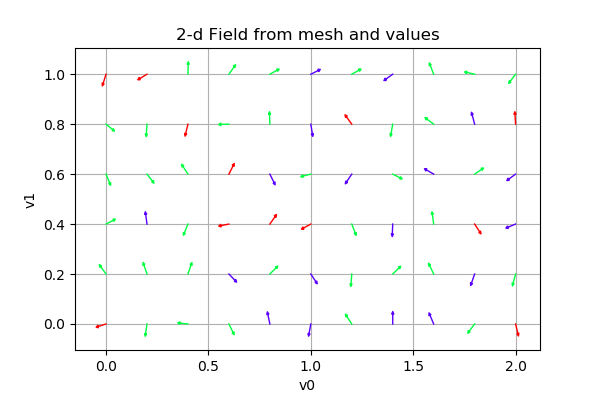

In [6]:
# Create a field from a mesh and some values
values = ot.Normal([0.0]*2, [1.0]*2, ot.CorrelationMatrix(2)).getSample(len(mesh.getVertices()))
for i in range(len(values)):
    x = values[i]
    values[i] = 0.05 * x / x.norm()
field = ot.Field(mesh, values)
graph = field.draw()
graph.setTitle('Field on 2-d mesh and 2-d values')
graph

In [39]:
# Compute the input mean of the field
field.getInputMean()

class=Point name=Unnamed dimension=2 values=[-0.000900458,0.00189042]

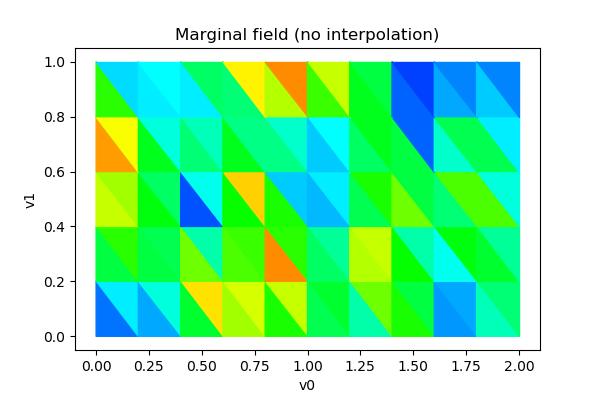

In [7]:
# Draw the field without interpolation
graph = field.drawMarginal(0, False)
graph.setTitle('Marginal field (no interpolation)')
graph

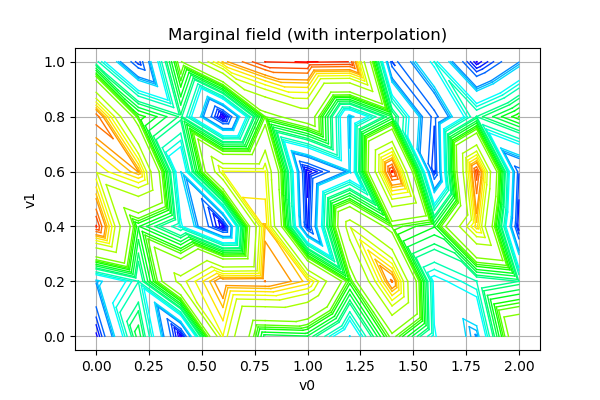

In [8]:
# Draw the field with interpolation
graph = field.drawMarginal(0)
graph.setTitle('Marginal field (with interpolation)')
graph

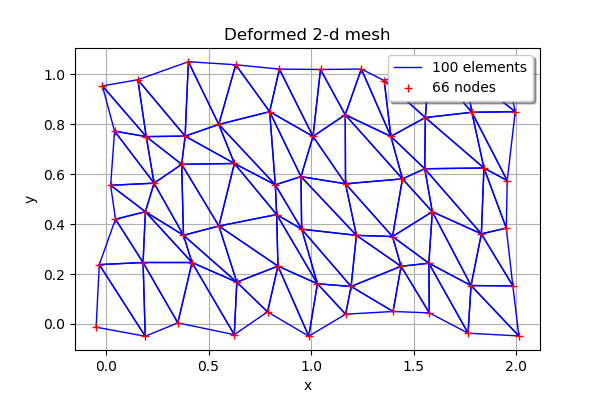

In [9]:
# Deform the mesh from the field according to the values of the field
# The dimension of the mesh (ie of its vertices) must be the same as the dimension of the field (ie its values)
graph = field.asDeformedMesh().draw()
graph.setTitle('Deformed 2-d mesh')
graph

In [43]:
# Export to the VTK format
field.exportToVTKFile('field.vtk')
with open('field.vtk') as f:
    print(f.read()[:100])

# vtk DataFile Version 3.0
Unnamed
ASCII

DATASET UNSTRUCTURED_GRID
POINTS 66 float
0 0 0.0
0.2 0 0.
